In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import string
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [2]:
df = pd.read_csv("sms-spam_file.csv")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
df.shape

(5572, 5)

In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#renaming the column names
df.rename(columns={'v1':'result','v2':'input'},inplace=True)

In [8]:
df

,result,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df['result'].value_counts()

result
ham     4825
spam     747
Name: count, dtype: int64

In [10]:
df.duplicated().sum()

403

In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(5169, 2)

In [13]:
df.head()

,result,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.replace({"ham":0,"spam":1},inplace = True)

C:\Users\sampa\AppData\Local\Temp\ipykernel_15072\804798773.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"ham":0,"spam":1},inplace = True)
C:\Users\sampa\AppData\Local\Temp\ipykernel_15072\804798773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({"ham":0,"spam":1},inplace = True)


In [15]:
df.head()

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**EDA-Exploratory Data Analysis**

In [17]:
#counts the number of spam and non-spam messages after dropping the duplicates
df['result'].value_counts()

result
0    4516
1     653
Name: count, dtype: int64

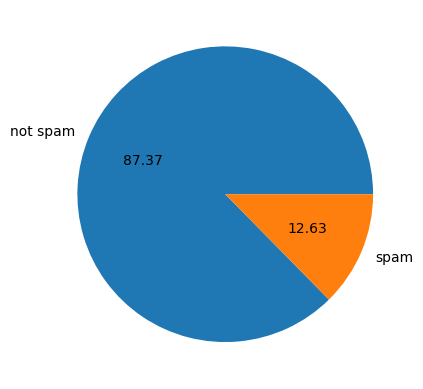

In [18]:
plt.pie(df['result'].value_counts(),labels=['not spam','spam'],autopct = '%0.2f')
plt.show()

In [19]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\sampa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\sampa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\sampa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\sampa\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\sampa\AppData\Roaming\nltk_data...
[

True

In [20]:
df['countCharacters'] = df['input'].apply(len)

df['countWords'] = df['input'].apply(lambda i:len(nltk.word_tokenize(i)))

df['countSentences'] = df['input'].apply(lambda i:len(nltk.sent_tokenize(i)))

C:\Users\sampa\AppData\Local\Temp\ipykernel_15072\1905248763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['countCharacters'] = df['input'].apply(len)
C:\Users\sampa\AppData\Local\Temp\ipykernel_15072\1905248763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['countWords'] = df['input'].apply(lambda i:len(nltk.word_tokenize(i)))
C:\Users\sampa\AppData\Local\Temp\ipykernel_15072\1905248763.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [21]:
df.head()

,result,input,countCharacters,countWords,countSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df[['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# For NOT-SPAM
df[df['result'] == 0][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# For SPAM
df[df['result'] == 1][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


observation : SPAM messages have more no of characters used in them (mean is 137.89 for SPAM and 70.45 for not SPAM)

<Axes: xlabel='countCharacters', ylabel='Count'>

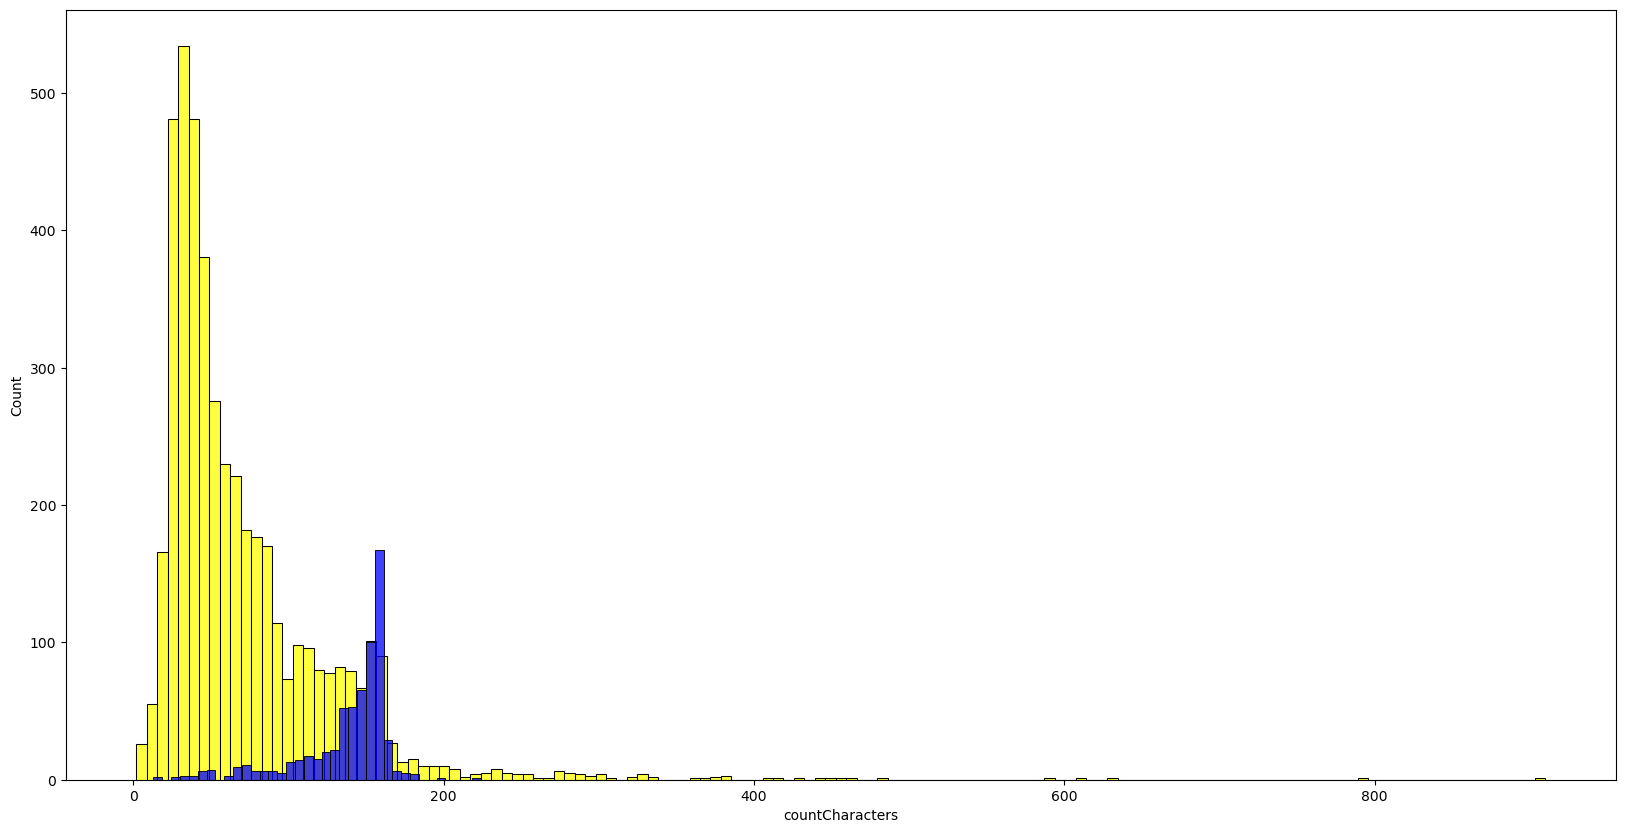

In [26]:
#for better visualization, we will plot a histogram using 'seaborn'
plt.figure(figsize = (20, 10))
sns.histplot(df[df['result'] == 0]['countCharacters'], color = "yellow")
sns.histplot(df[df['result'] == 1]['countCharacters'], color = "blue")

#blue -> SPAM, yellow -> NOT SPAM

<Axes: xlabel='countWords', ylabel='Count'>

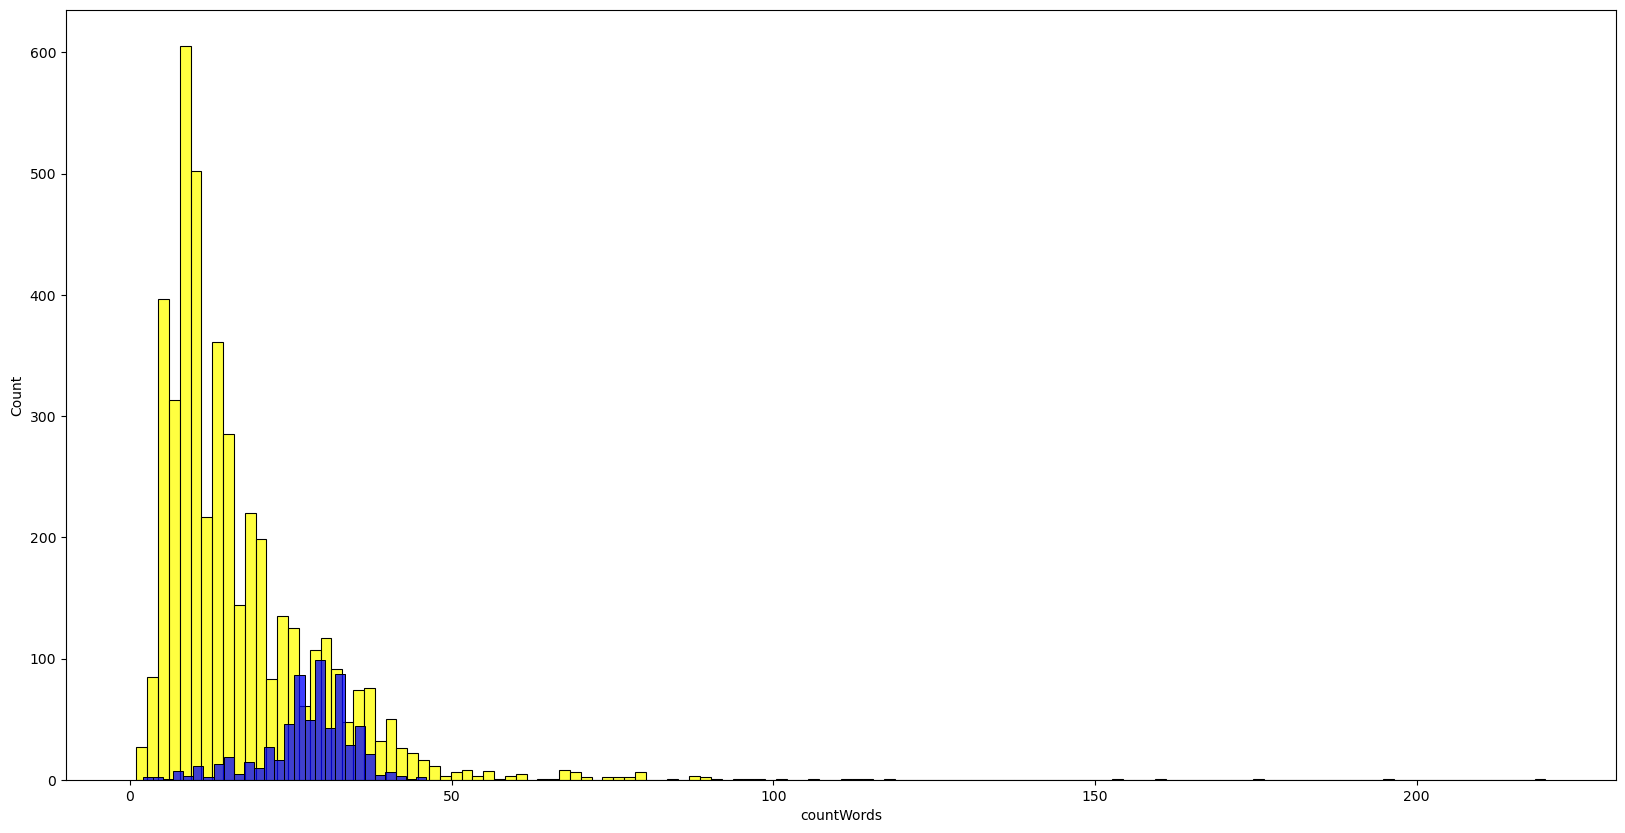

In [27]:
plt.figure(figsize = (20, 10))
sns.histplot(df[df['result'] == 0]['countWords'], color = "yellow")
sns.histplot(df[df['result'] == 1]['countWords'], color = "blue")

<Axes: xlabel='countSentences', ylabel='Count'>

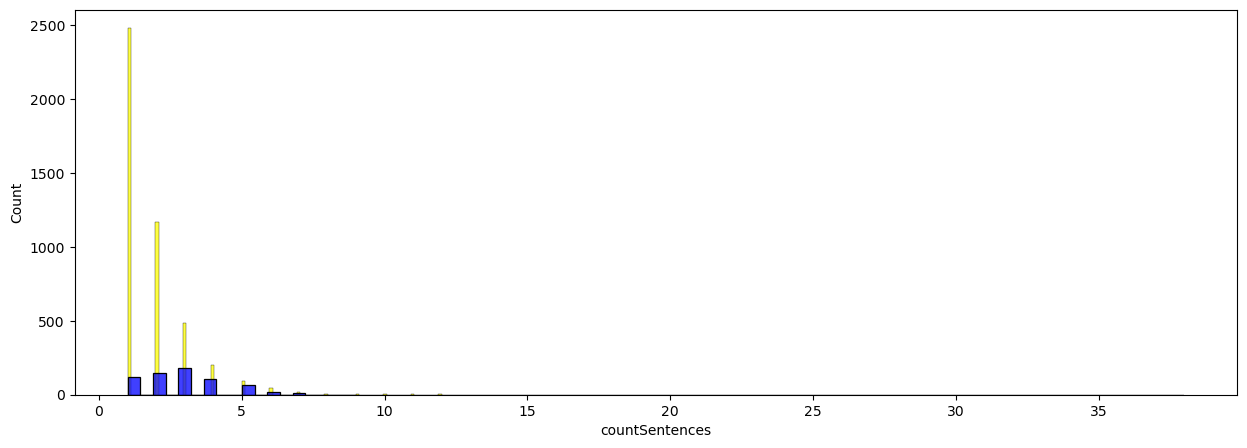

In [28]:
plt.figure(figsize = (15, 5))
sns.histplot(df[df['result'] == 0]['countSentences'], color = "yellow")
sns.histplot(df[df['result'] == 1]['countSentences'], color = "blue")

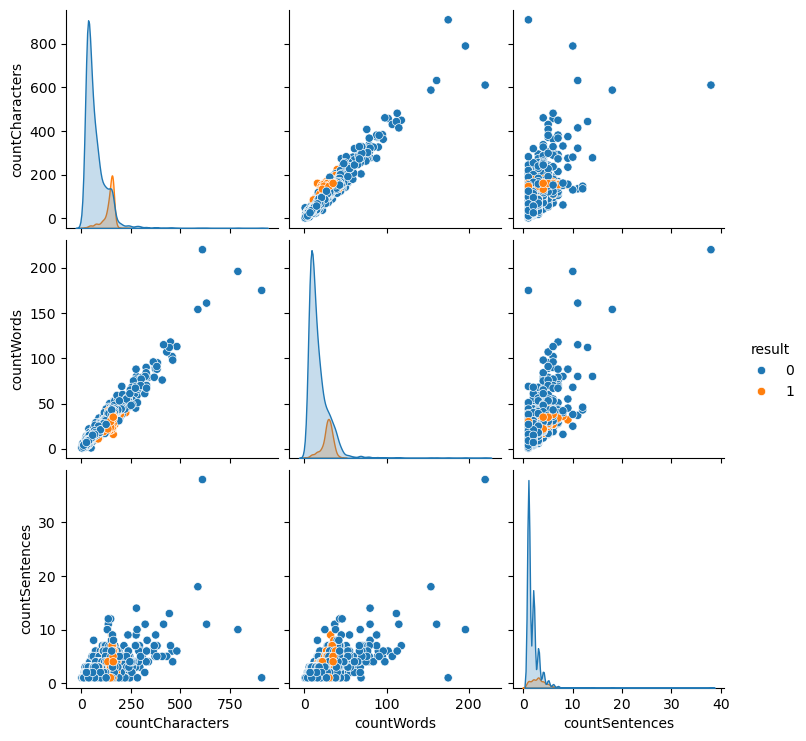

In [29]:
# Showing the relationship between the columns
sns.pairplot(df, hue='result')

**Data Preprocessing**

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sampa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english") # removes "am" "is" "the" etc
ps = PorterStemmer()

def transform_text(text):
    useful_words=[]
    
    text = text.lower() # converts the text in lower-case and stores it in text itself 
    words = nltk.word_tokenize(text) # breaks the text into tokens i.e words
    
    for sample_word in words:
        if sample_word not in stop_words  and sample_word not in string.punctuation and sample_word.isalnum():
            stemmed_word = ps.stem(sample_word) 
            useful_words.append(stemmed_word)
            
    return " ".join(useful_words)

In [33]:
transform_text("I am Diana454 $#@^ Prince !! and I love playing games@")

'diana454 princ love play game'

In [34]:
df.loc[:, 'processed'] = df.loc[:, 'input'].apply(transform_text)
df.head()

C:\Users\sampa\AppData\Local\Temp\ipykernel_15072\3024150437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'processed'] = df.loc[:, 'input'].apply(transform_text)


,result,input,countCharacters,countWords,countSentences,processed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
import sys
print(sys.executable)  # Shows the Python interpreter path


C:\ProgramData\anaconda3\python.exe


In [36]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [37]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')

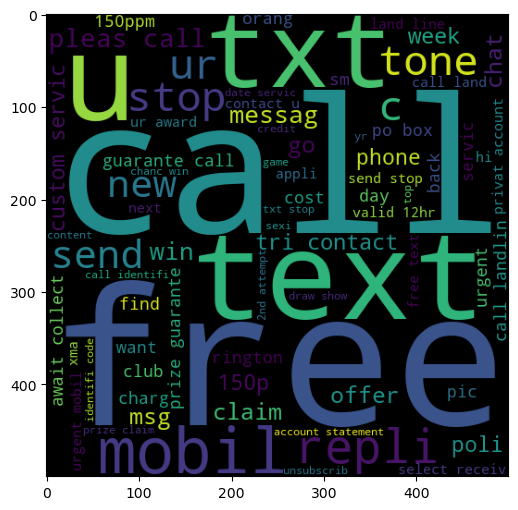

In [38]:
#creating a wordcloud for the SPAM messages
spamWC = wc.generate(df[df['result'] == 1]['processed'].str.cat(sep=" "))

#creating figure and displaying
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

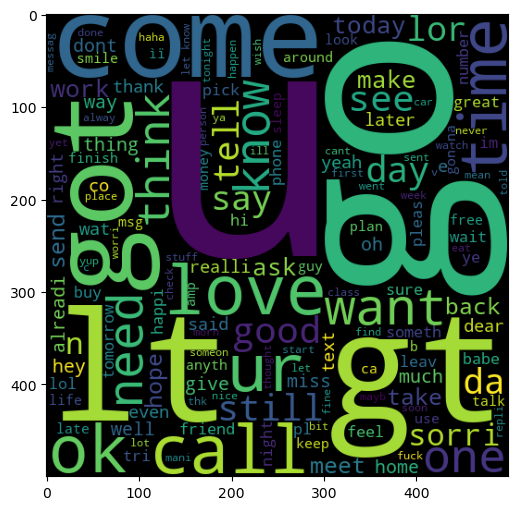

In [39]:
#creating a wordcloud for the NOT-SPAM messages
noSpamWC = wc.generate(df[df['result'] == 0]['processed'].str.cat(sep=" "))

#creating figure and displaying
plt.figure(figsize=(12, 6))
plt.imshow(noSpamWC)

In [40]:
#extracting all the words used in SPAM messages
spamWords = []

for msg in df[df['result'] == 1]['processed'].tolist():
  for word in msg.split():
    spamWords.append(word)

spamWords

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [41]:
#to count the frequency of the words, we will be using the Counter class to create a dictionary
spamDictionary = Counter(spamWords)

spamDictionary

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [42]:
#to extract the most common words
spamDictionary.most_common(40)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35)]

In [43]:
#converting this dictionary to a dataframe
mostCommonSPAM = pd.DataFrame(spamDictionary.most_common(40))

In [44]:
mostCommonSPAM.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


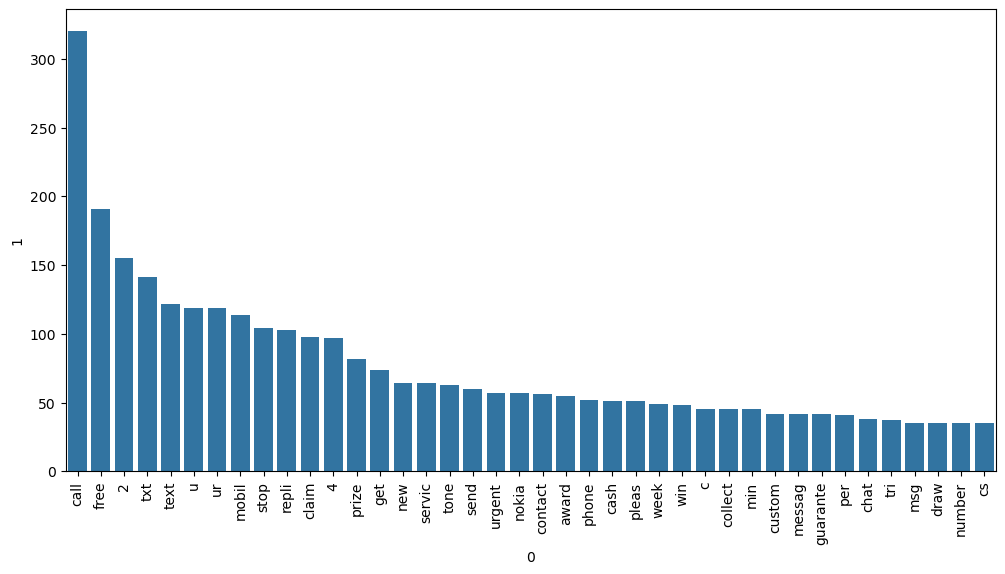

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(data = mostCommonSPAM, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

**Model Building**

We use NaiveBayes classifier

In [48]:
df.head()

,result,input,countCharacters,countWords,countSentences,processed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


*converting the 'processed' column into vectors.*

In [50]:
cv = CountVectorizer()

In [51]:
#transforming the data of processed column, so that the data is represented in terms of numbers
df.loc[:,'processed'] = df.loc[:,'processed'].fillna('') 
X = cv.fit_transform(df['processed']).toarray()

#printing size of X
X.shape

(5169, 6708)

In [52]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
df.head()

,result,input,countCharacters,countWords,countSentences,processed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
y = df['result'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [55]:
#splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [56]:
#training the dataset for Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9651972157772621
[[1103    4]
 [  41  145]]
0.9731543624161074


**We take a test case to see if our model is working properly**

In [58]:
sms=["Dear Valued Customer,Congratulations!You are the lucky winner of $1,000,000 in our annual sweepstakes. To claim your prize, please provide your personal details and bank account information by clicking the link below:",
      "Hi Alex,I hope this email finds you well. I wanted to remind you that the deadline for submitting the final project report is next Friday, January 26th. Please let me know if you have any questions or need assistance with any part of the report.Looking forward to seeing your submission."]
sms_vector=cv.transform(sms).toarray()
bnb.predict(sms_vector)

array([1, 0], dtype=int64)

In [59]:
sms_vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('spam.pkl','wb'))